<a href="https://colab.research.google.com/github/vitoriafrare2000/projects/blob/main/duffing_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

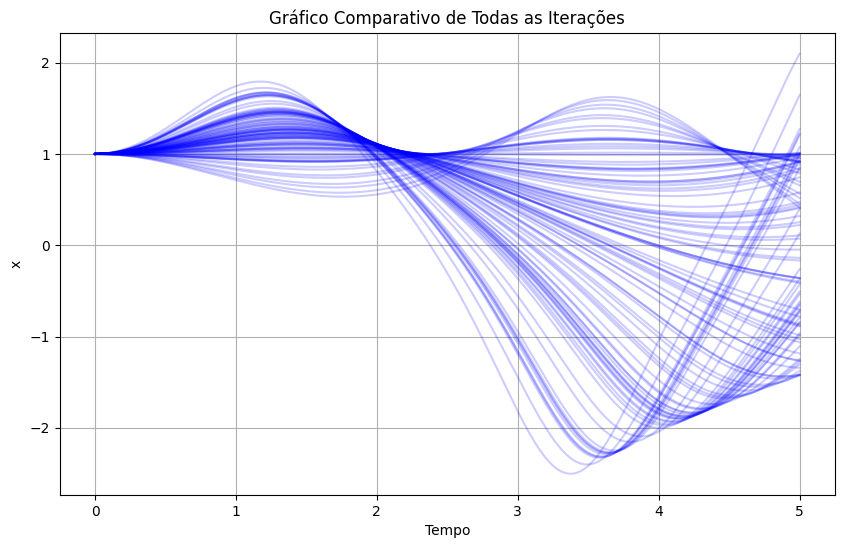

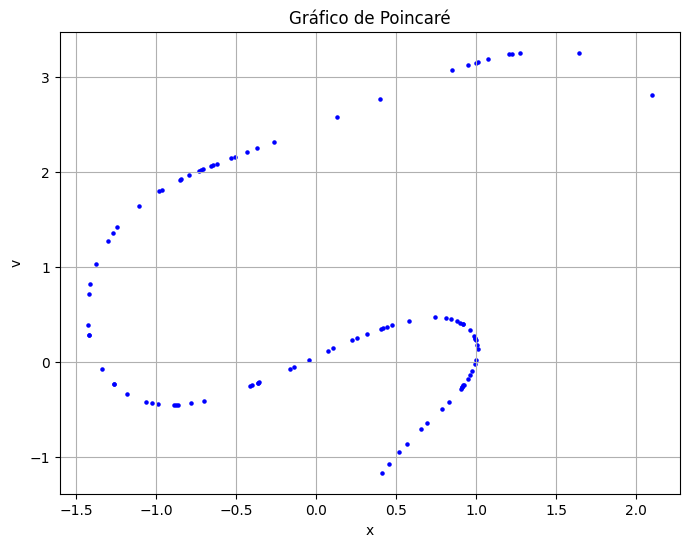

<ipython-input-2-50c1106fe2ac>:65: RuntimeWarning: divide by zero encountered in log
  log_diff = np.log(np.abs(sol_1.y[0] - sol_2.y[0]))


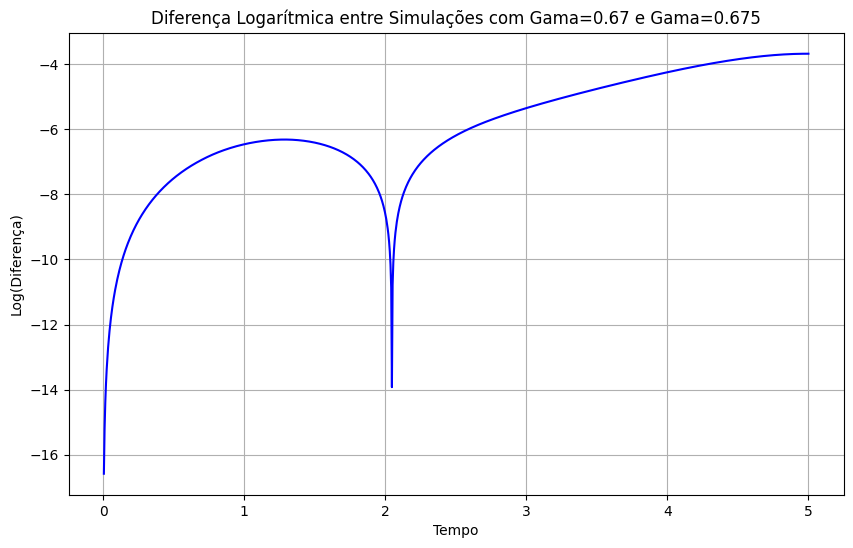

<ipython-input-2-50c1106fe2ac>:82: RuntimeWarning: divide by zero encountered in log
  log_diff = np.log(np.abs(sol_1.y[0] - sol_2.y[0]))


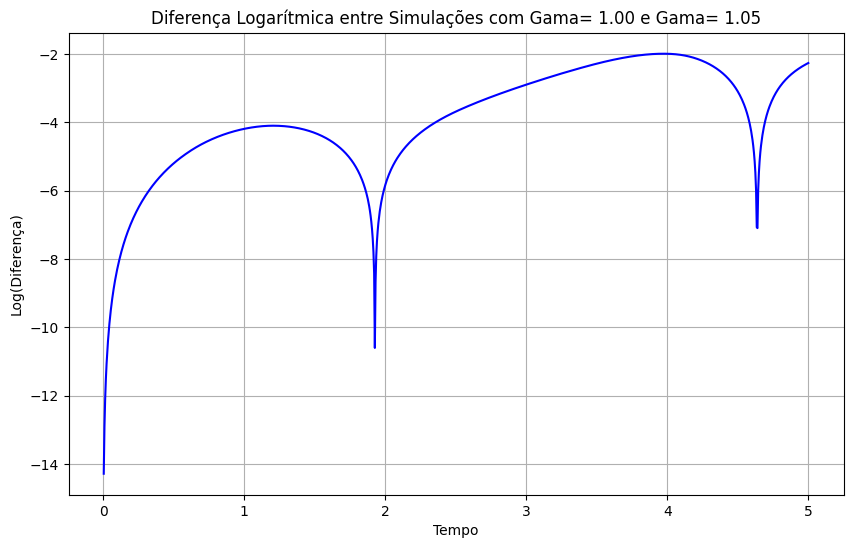

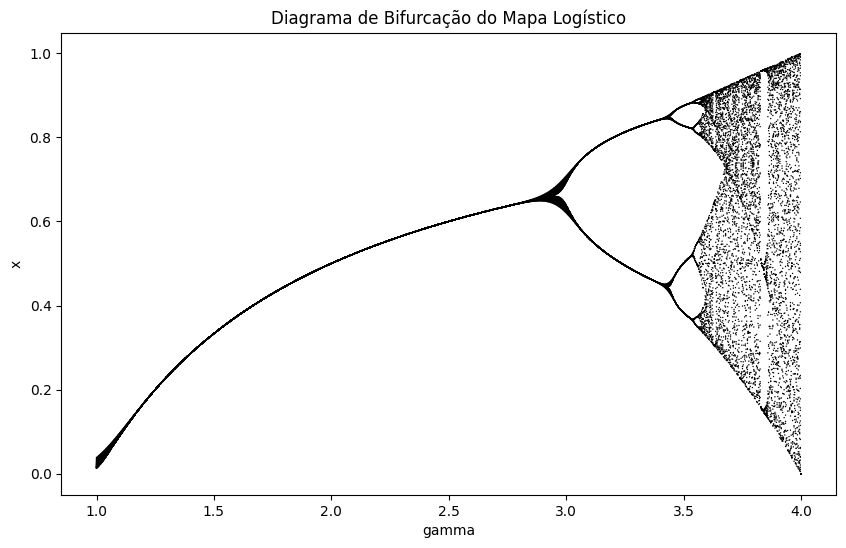

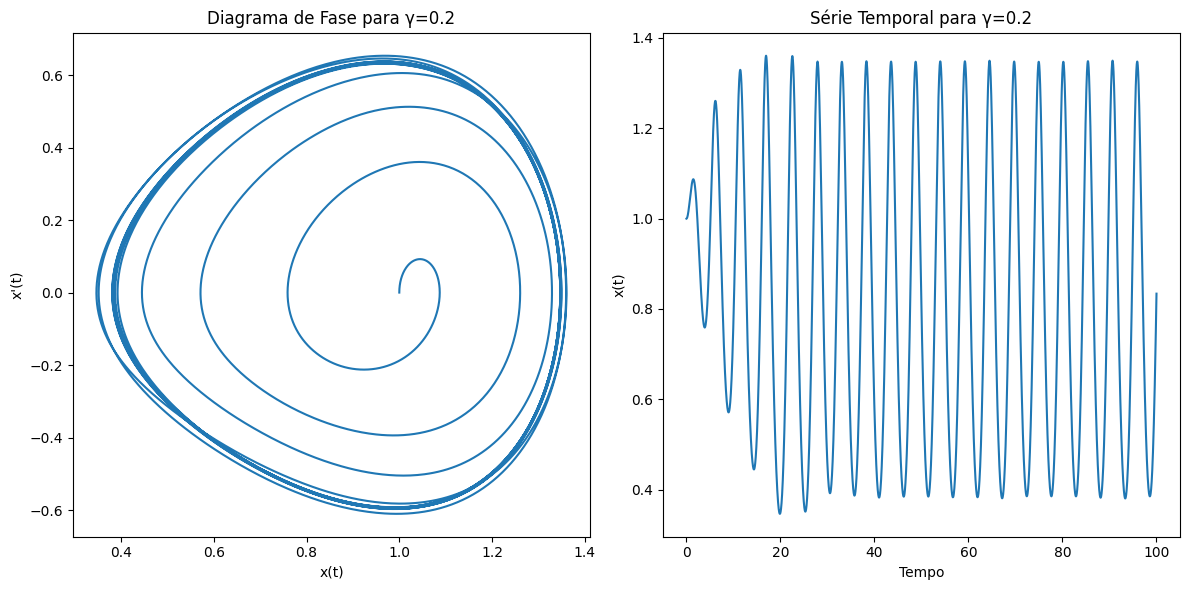

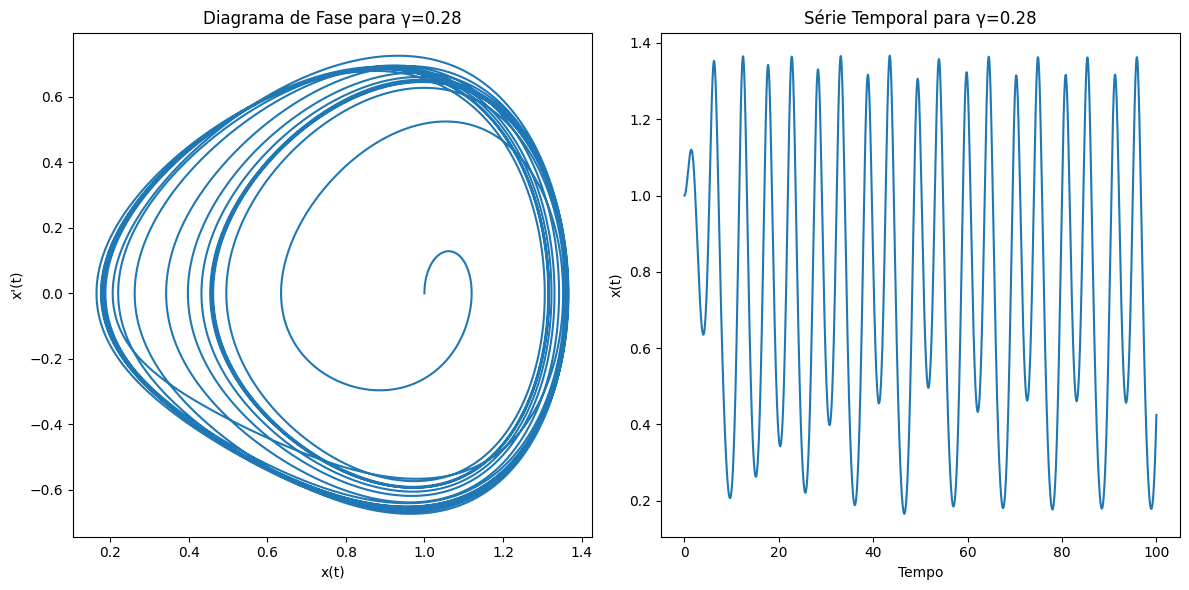

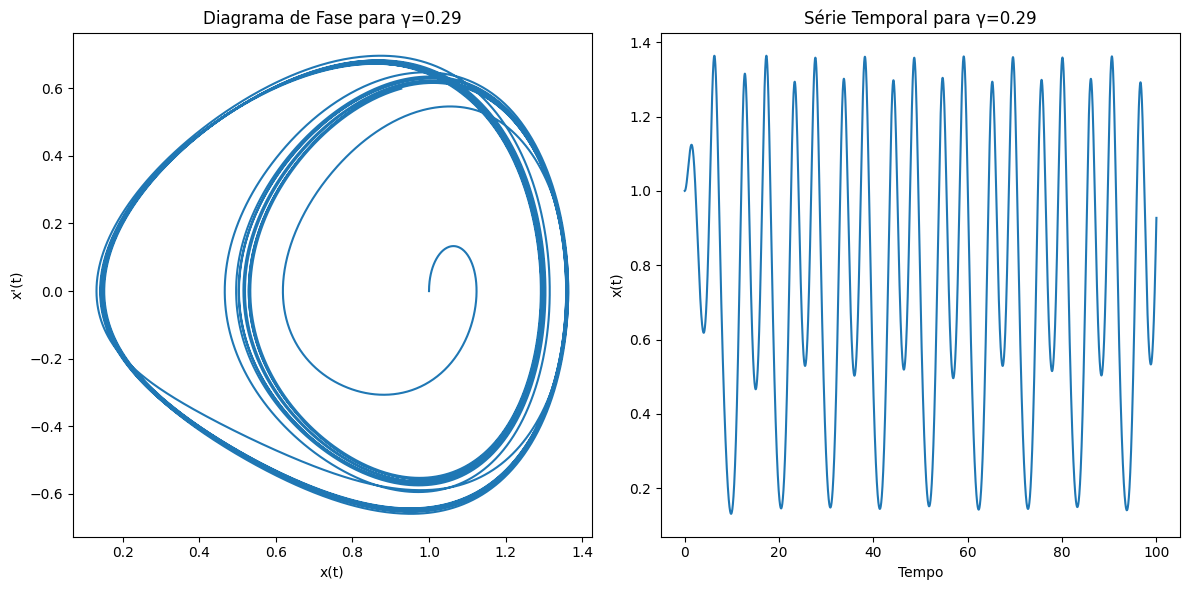

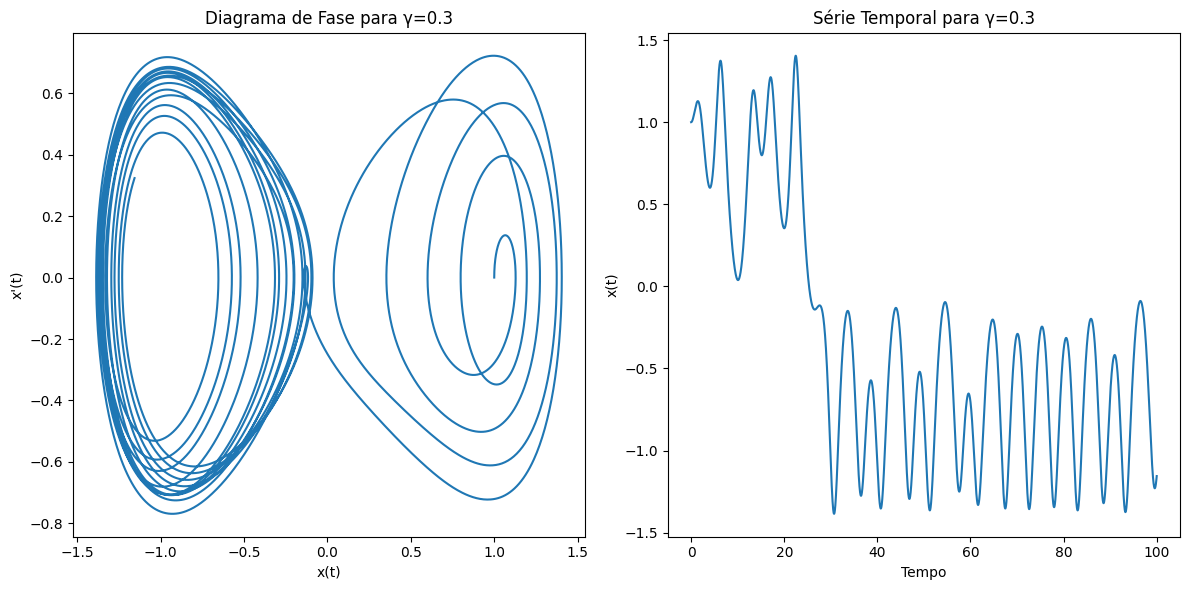

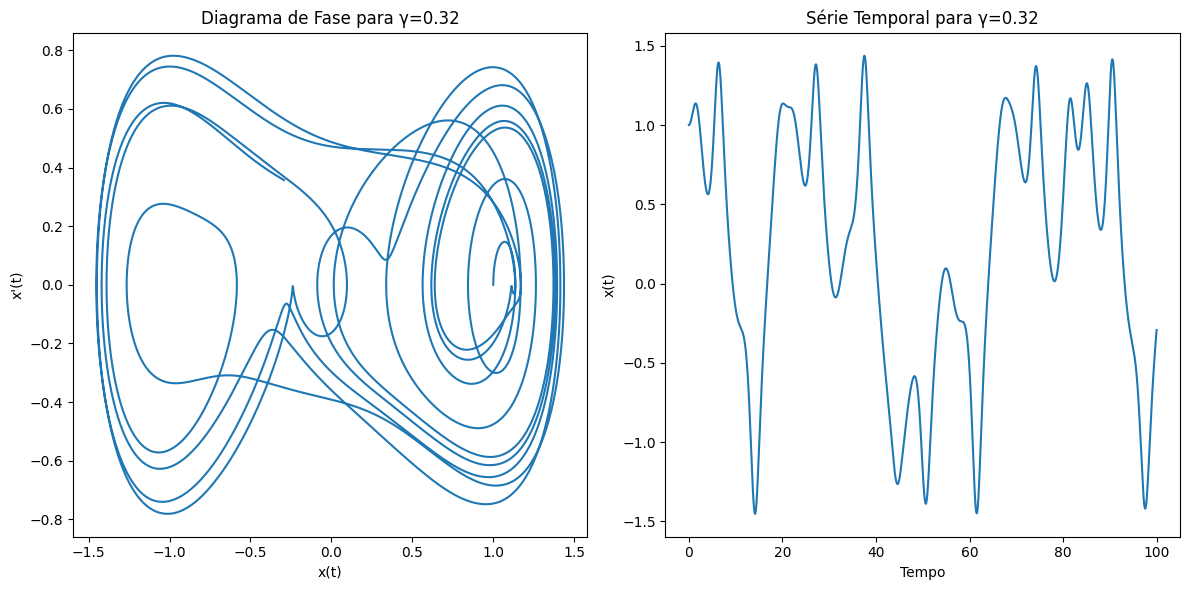

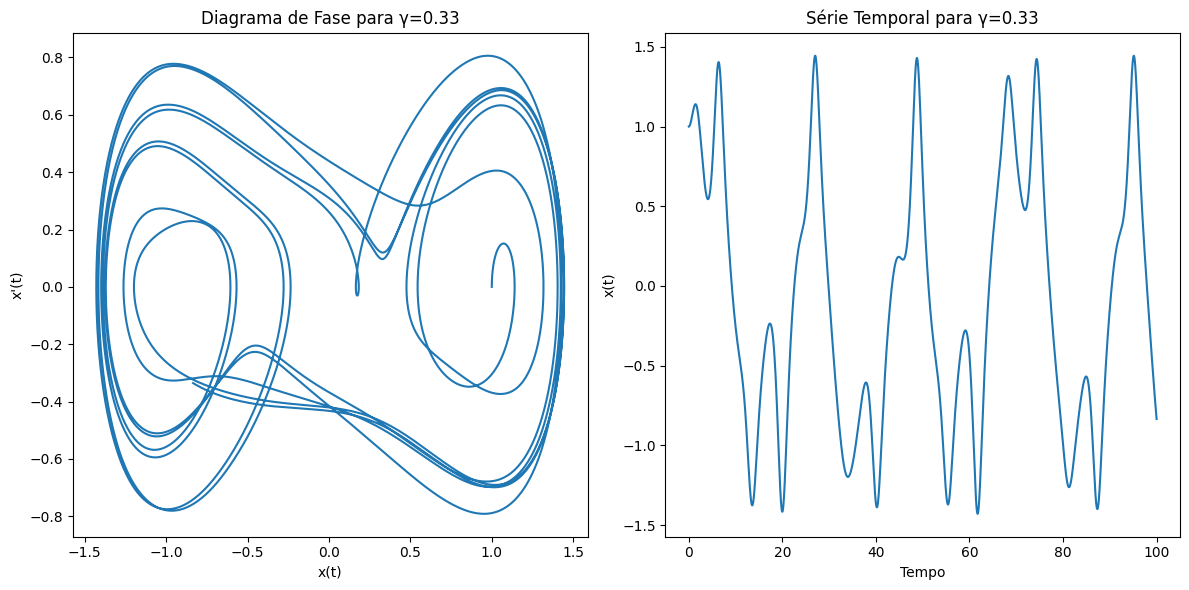

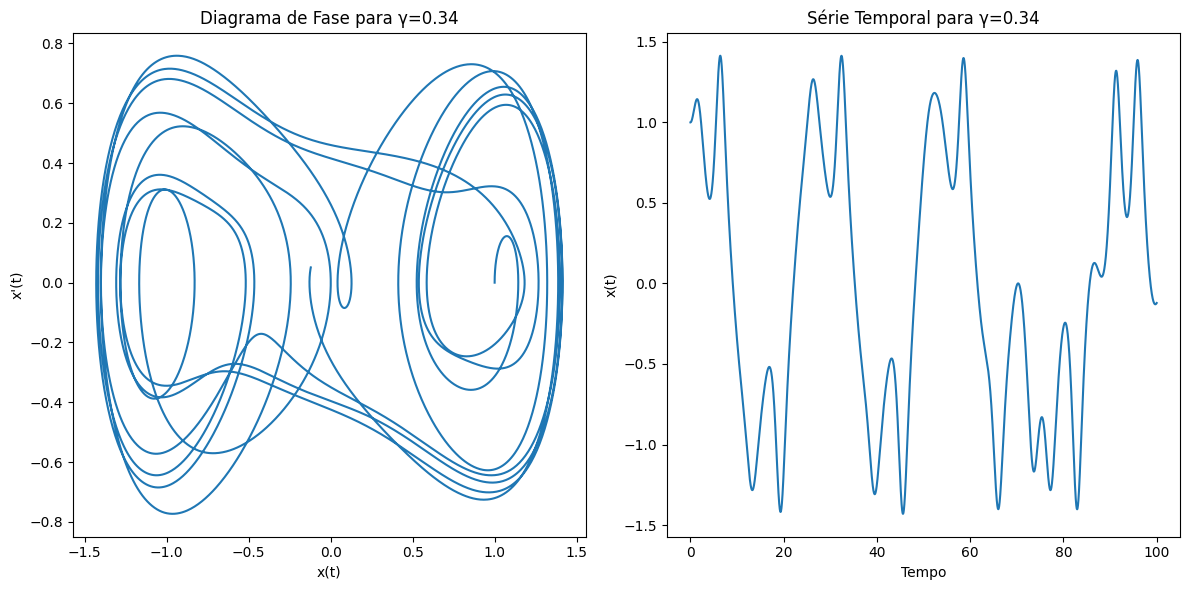

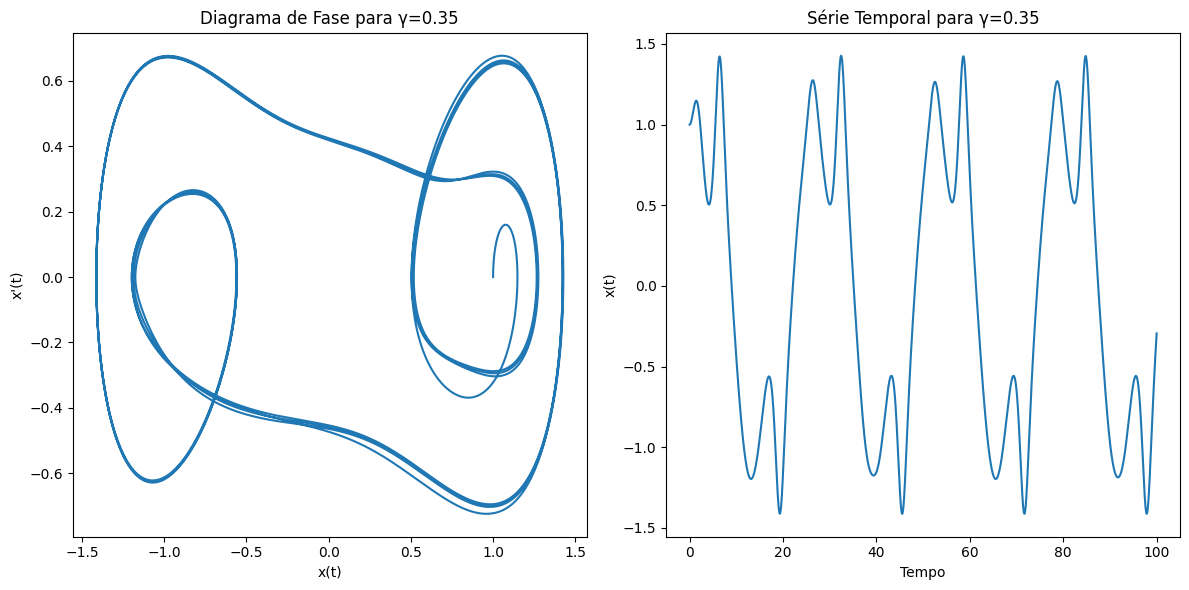

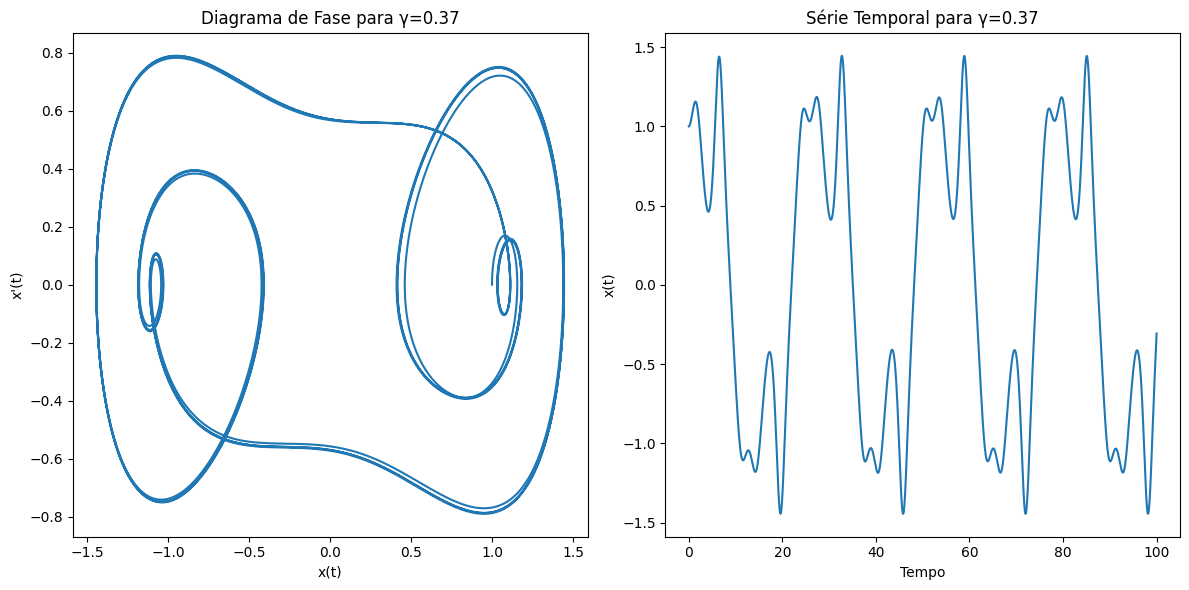

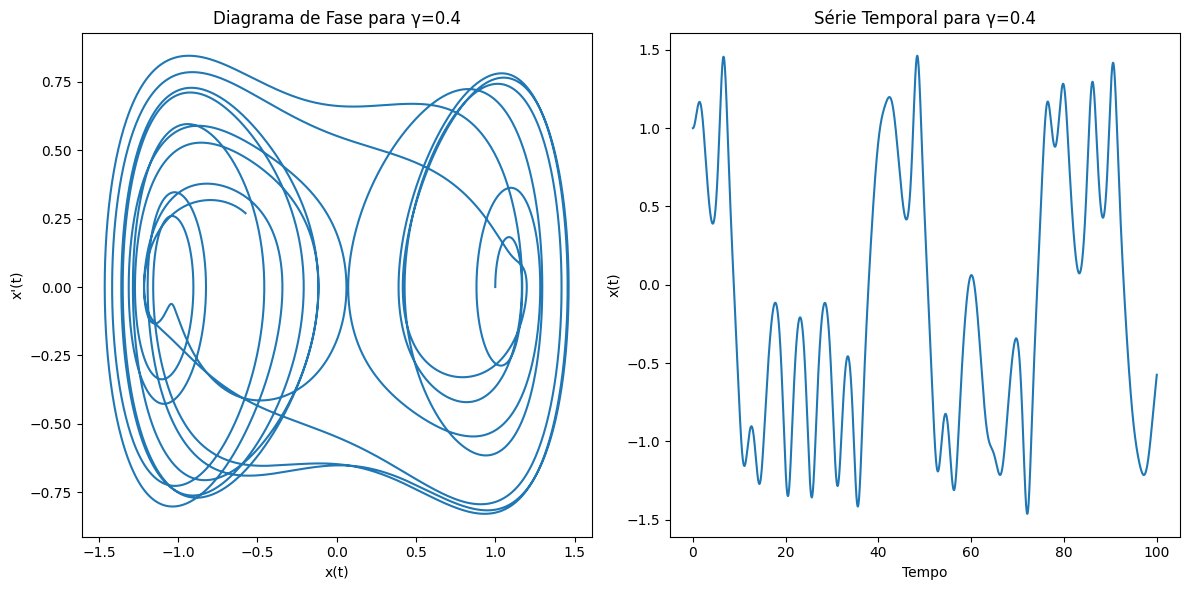

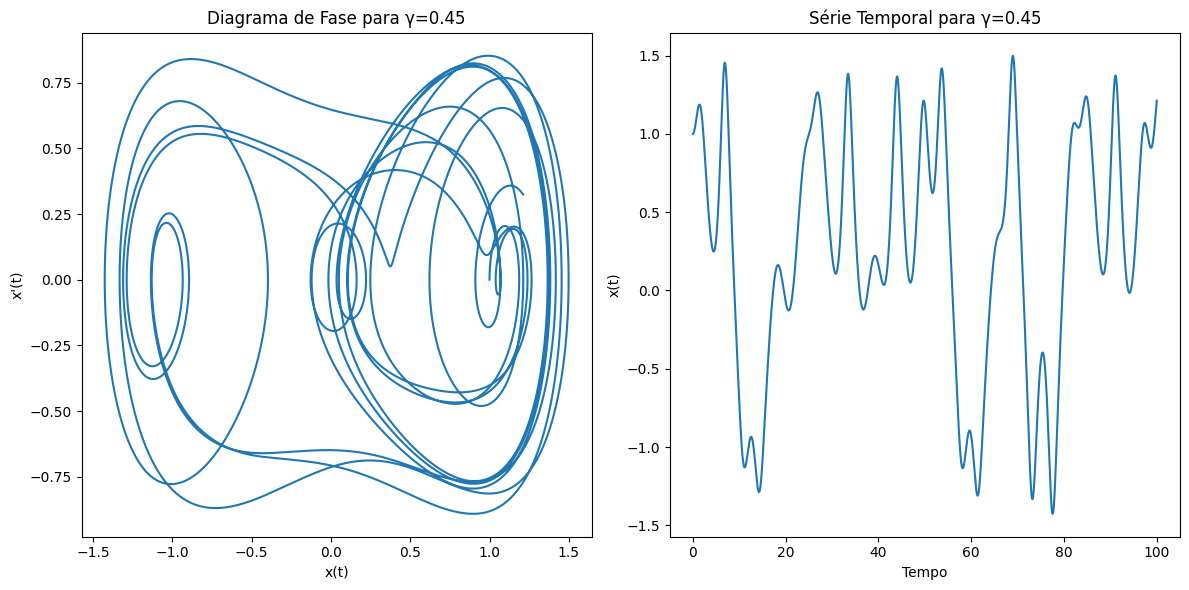

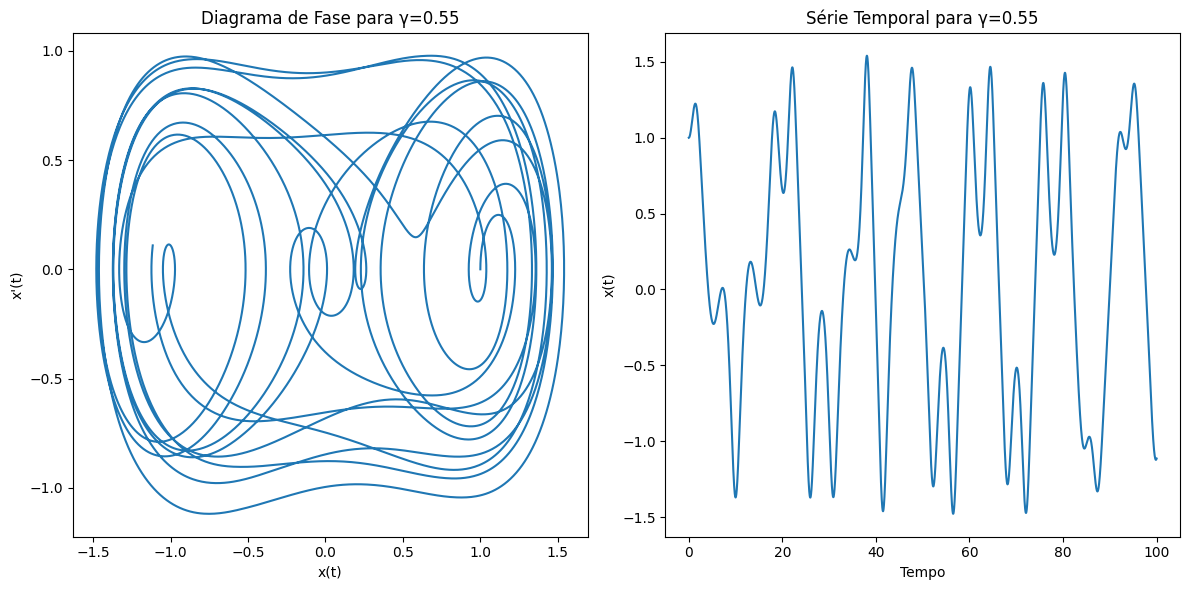

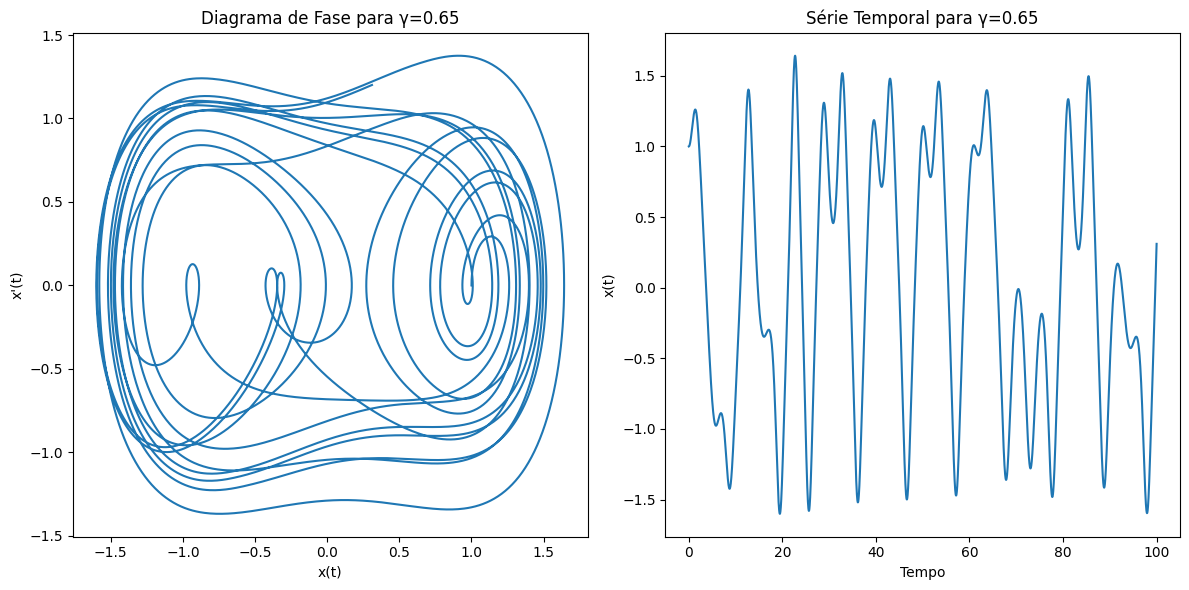

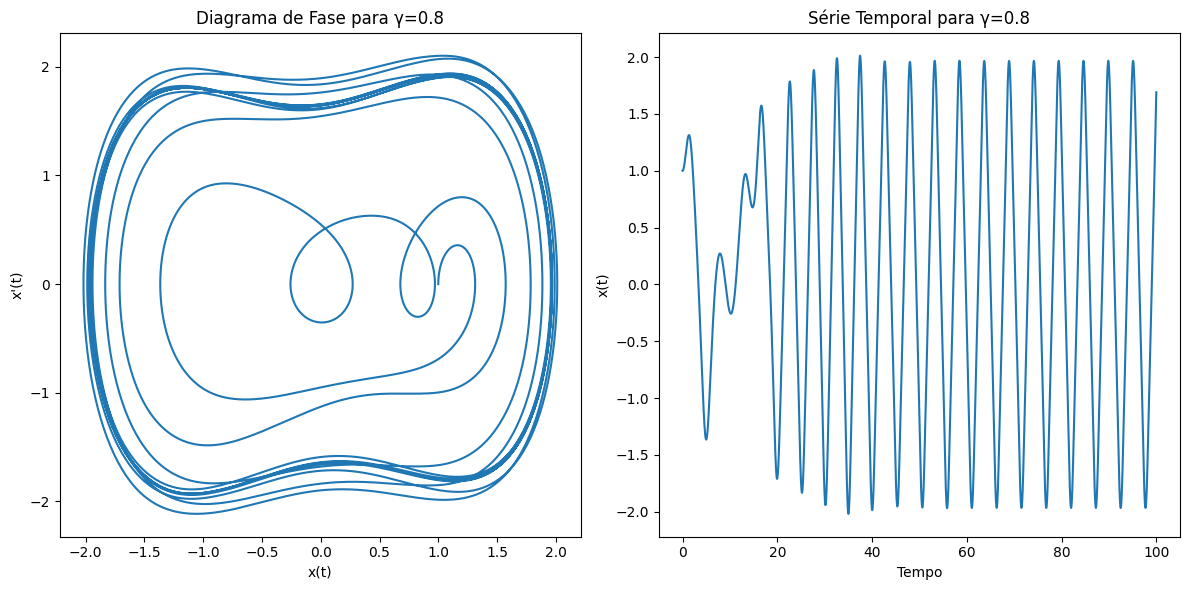

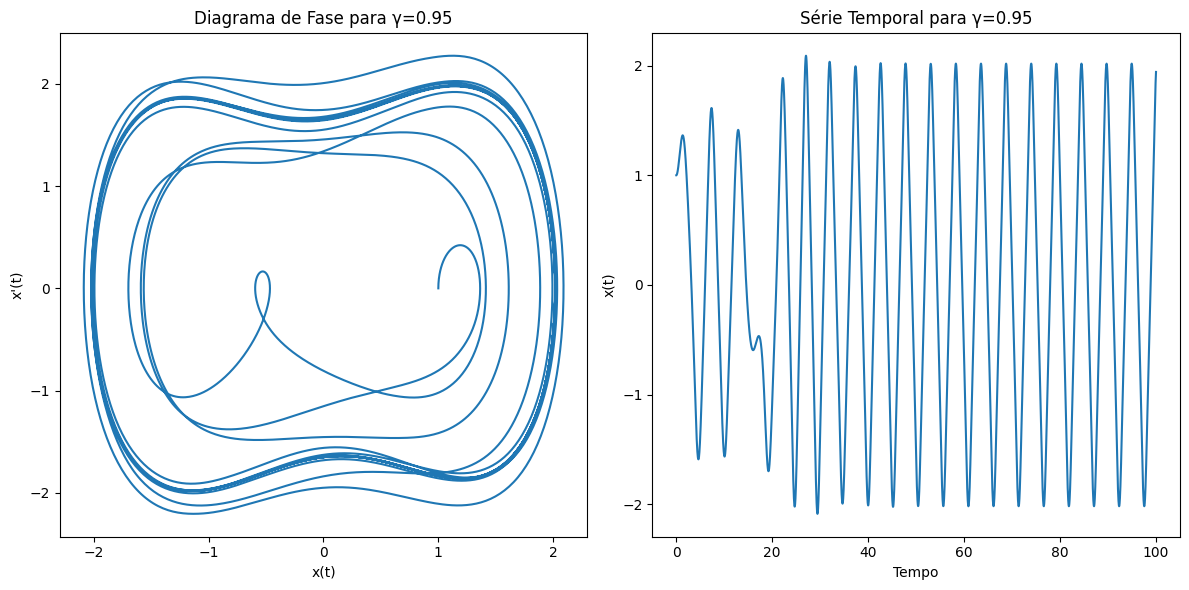

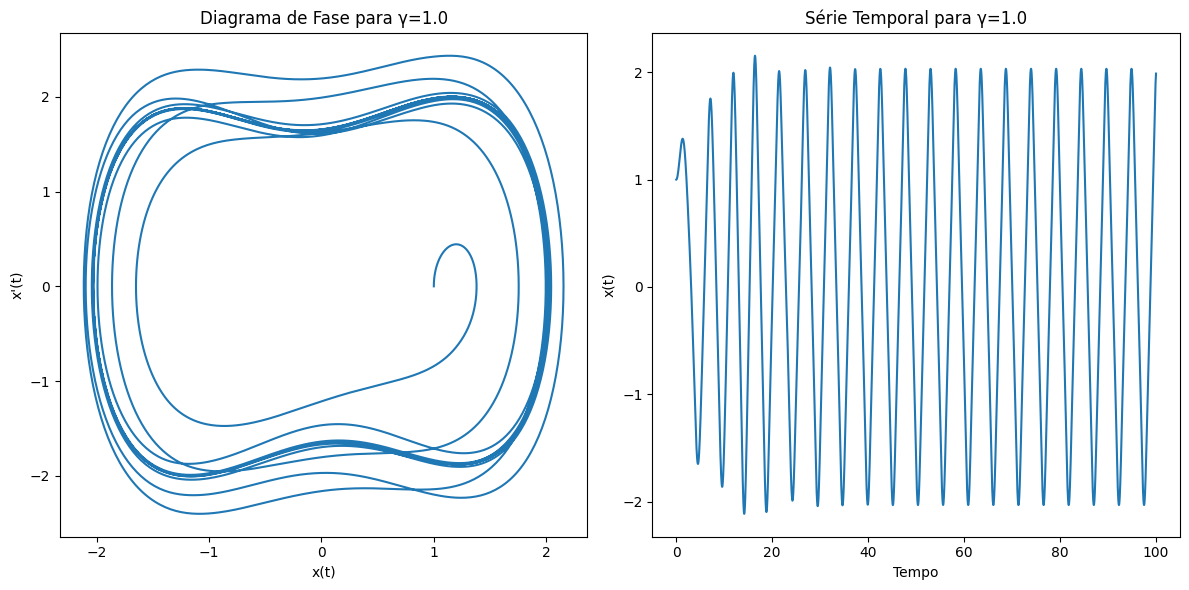

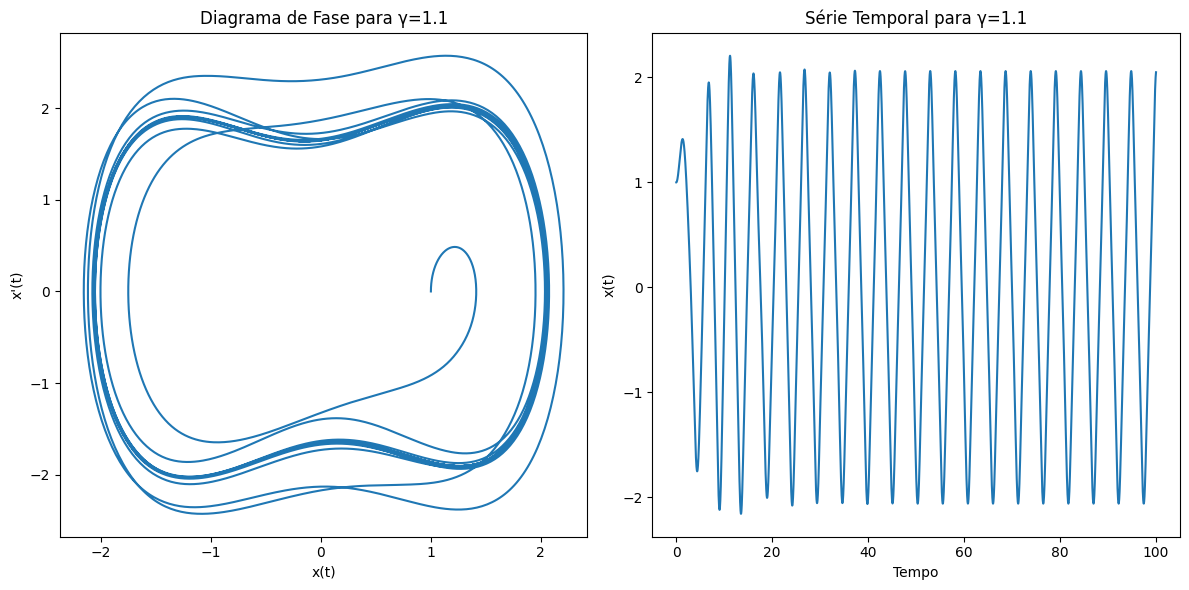

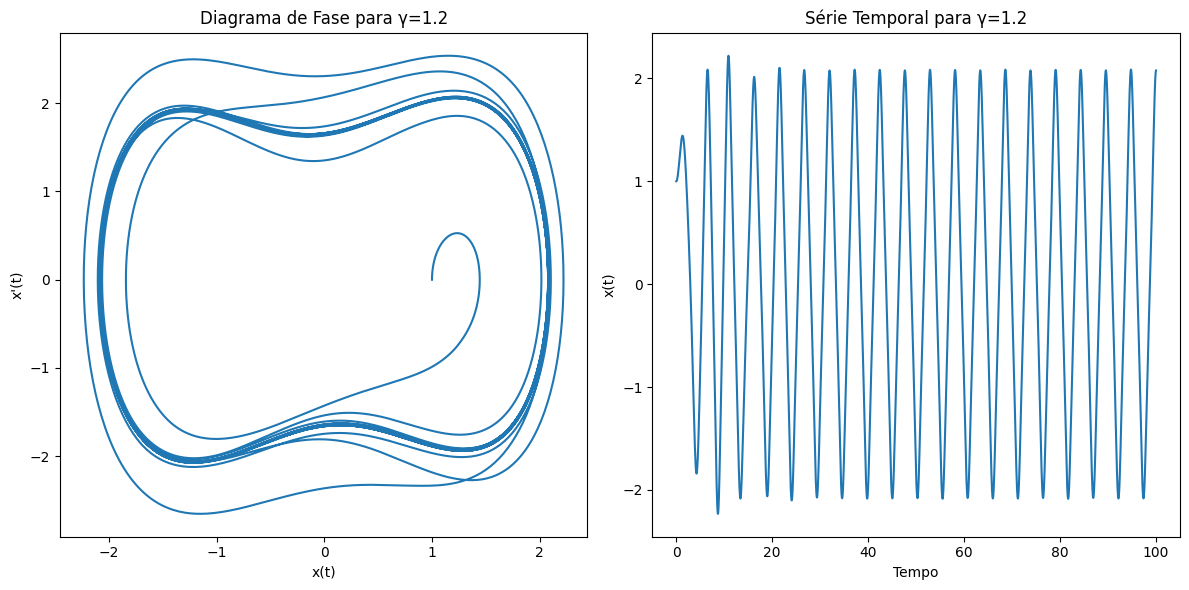

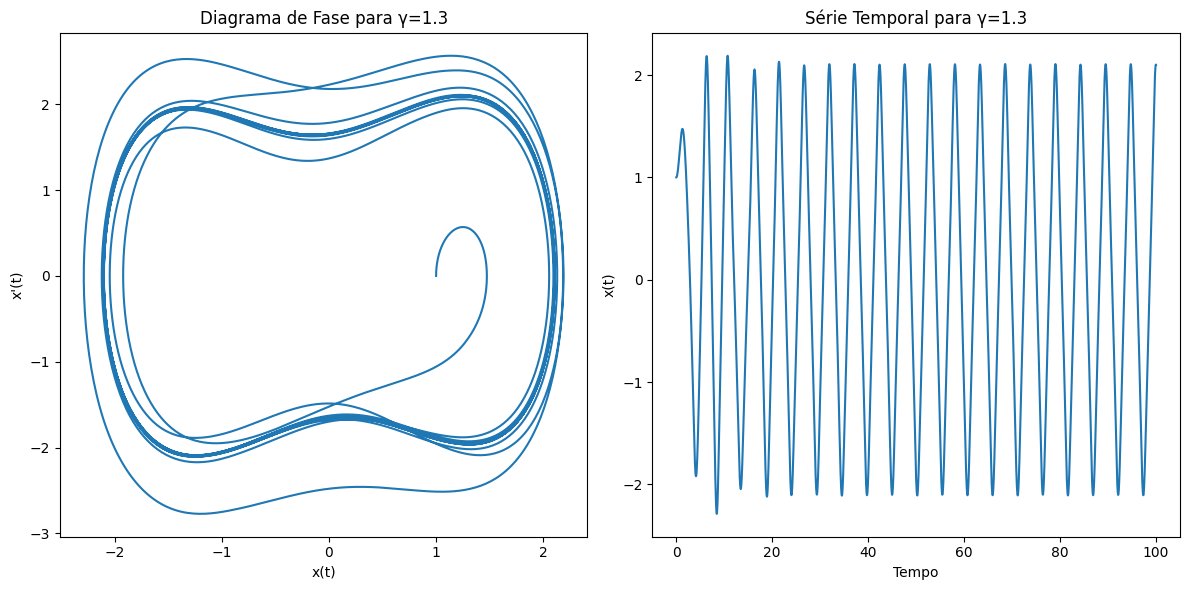

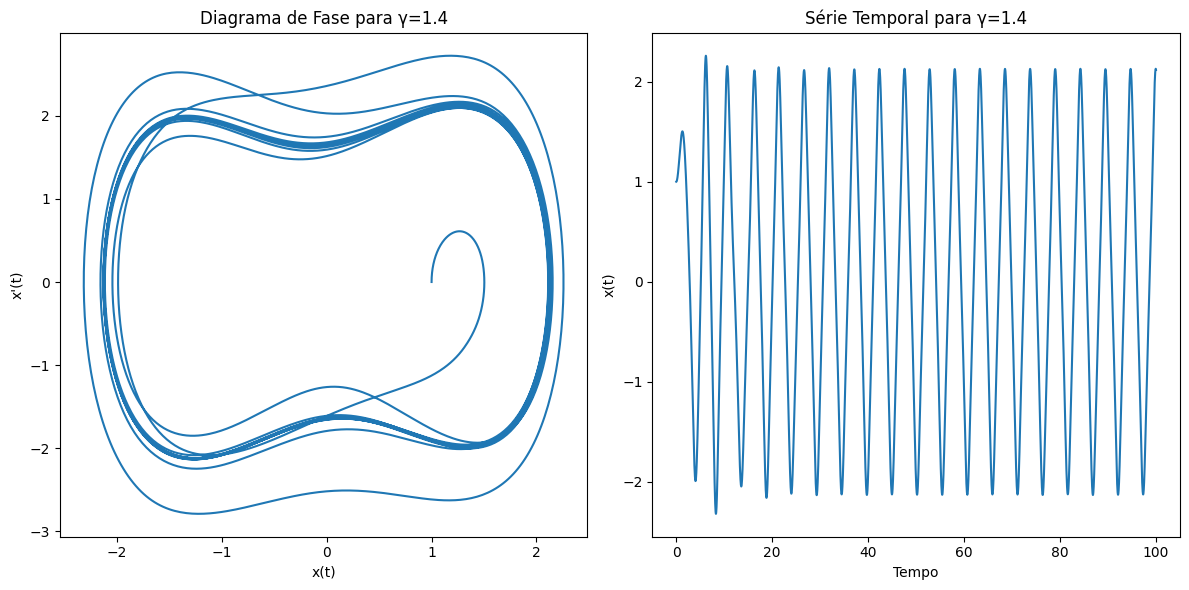

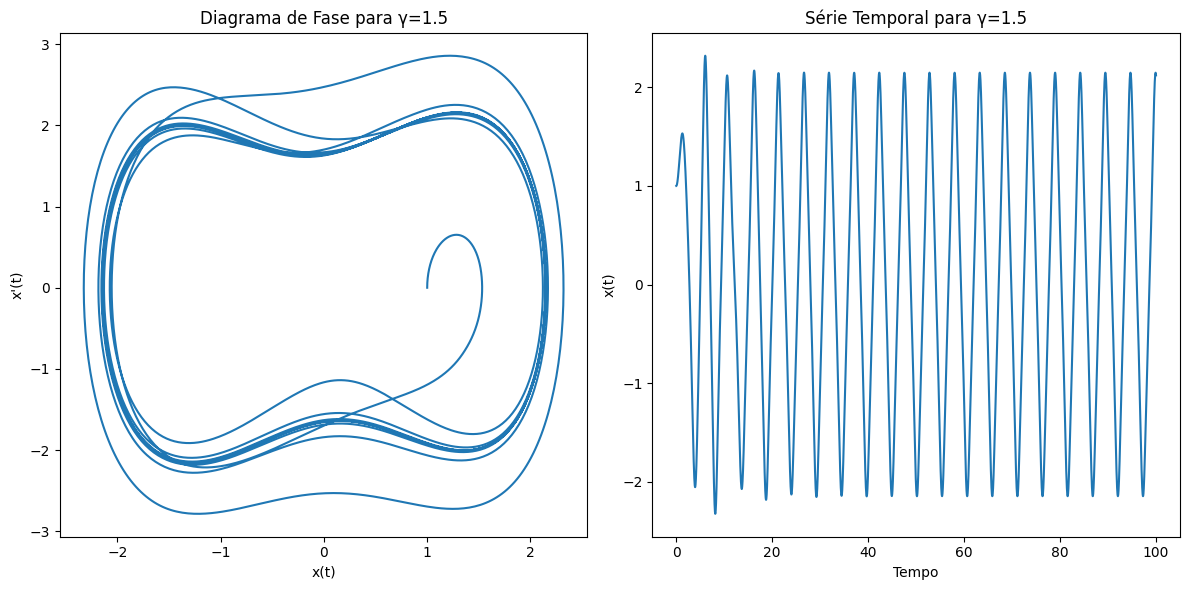

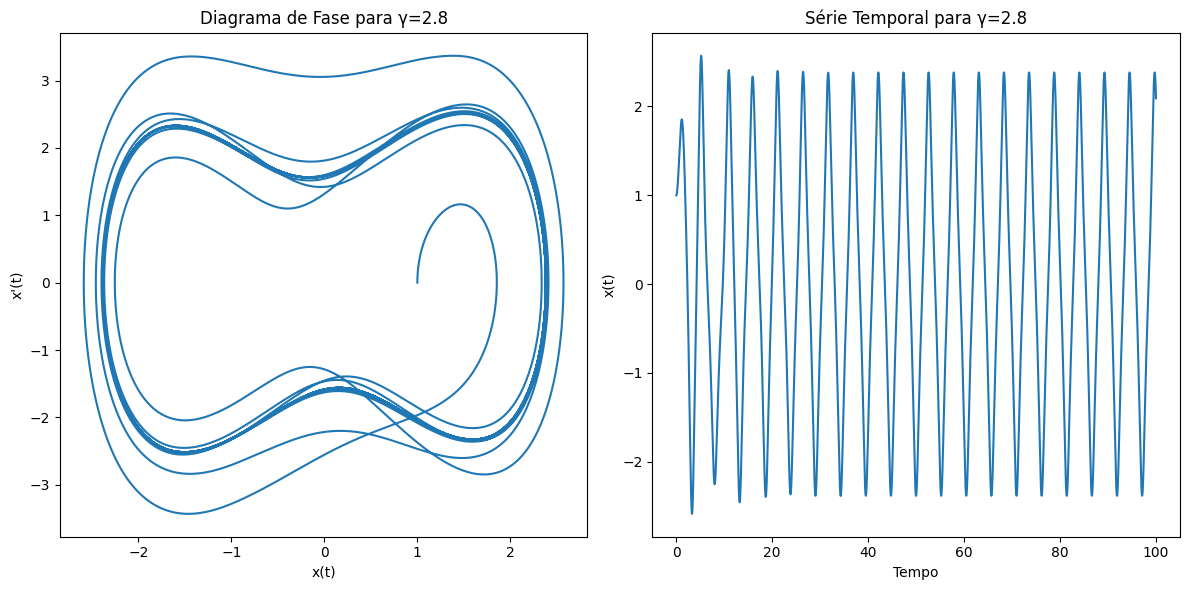

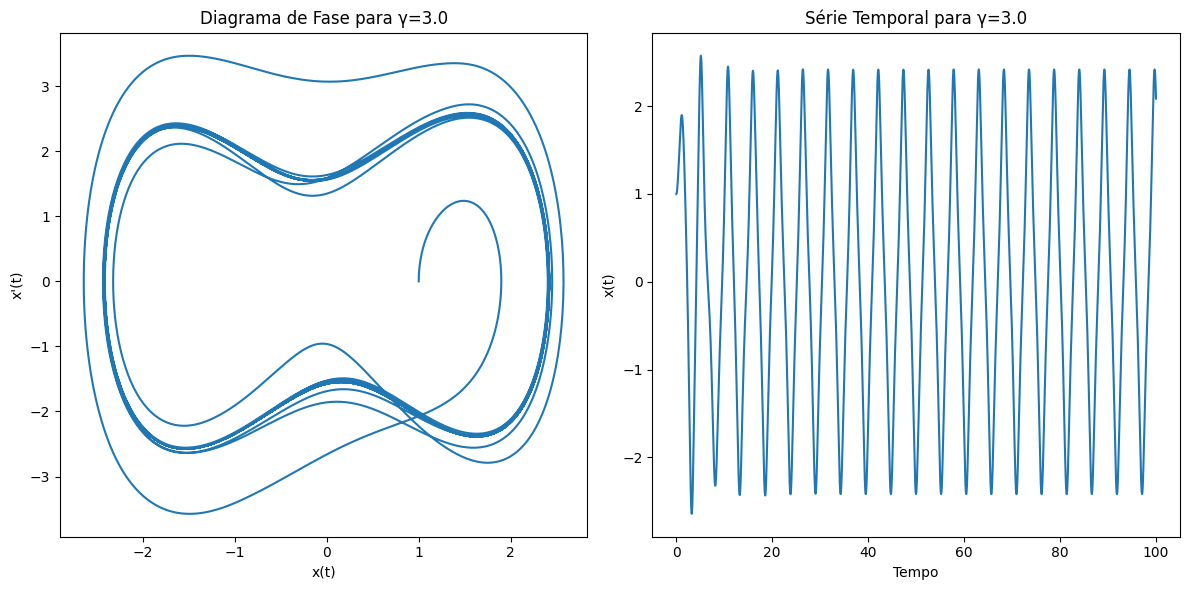

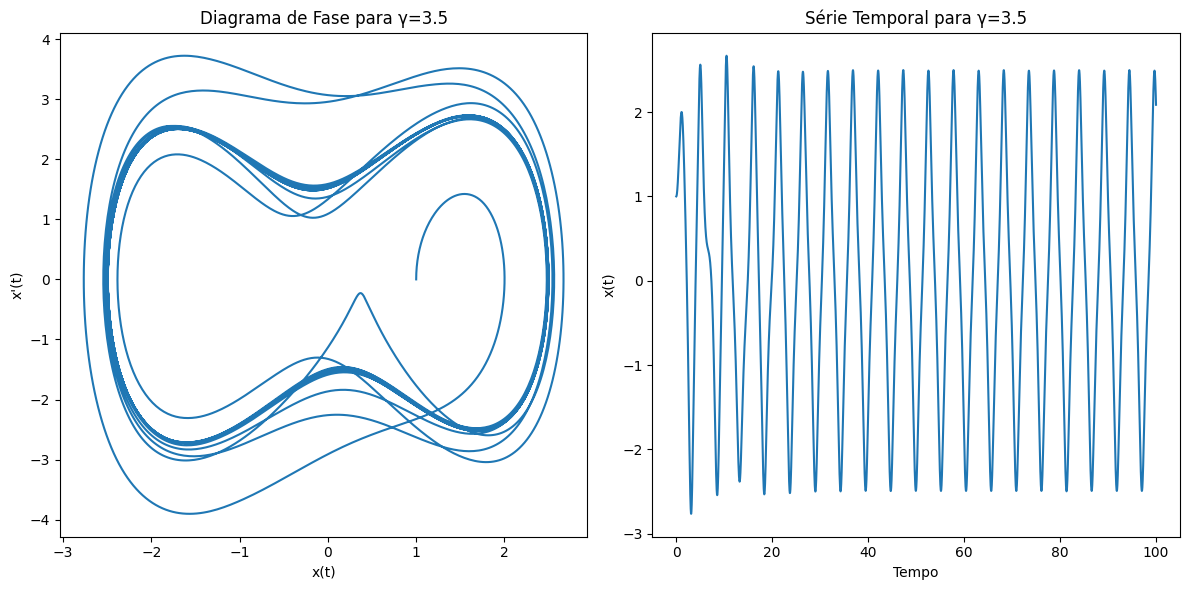

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definição da equação diferencial
def equation(t, y, delta, alpha, beta, gamma, omega):
    x, v = y
    dydt = [v, -delta*v - alpha*x - beta*x**3 + gamma*np.cos(omega*t)]
    return dydt

# Parâmetros da equação
delta = 0.3
alpha = -1.0
beta = 1.0
omega = 1.2

# Condições iniciais
x0 = [1.0, 0.0]

# Parâmetros para gerar caos
mean_gamma = 0.75
std_dev_gamma = 0.70

# Tempo de integração
t_span = (0, 5)  # Intervalo de até 5 segundos

# Parâmetros variando
gamma_vals = np.random.normal(mean_gamma, std_dev_gamma, 100)

# Plotagem dos resultados comparativos
plt.figure(figsize=(10, 6))

for gamma in gamma_vals:
    sol = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma, omega),
                    t_eval=np.linspace(t_span[0], t_span[1], 1000))
    plt.plot(sol.t, sol.y[0], color='b', alpha=0.2)

plt.title('Gráfico Comparativo de Todas as Iterações')
plt.xlabel('Tempo')
plt.ylabel('x')
plt.grid(True)
plt.show()

# Plotagem do Gráfico de Poincaré
plt.figure(figsize=(8, 6))

for gamma in gamma_vals:
    sol = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma, omega),
                    t_eval=np.linspace(t_span[0], t_span[1], 1000))
    plt.scatter(sol.y[0][-1], sol.y[1][-1], s=5, color='b')

plt.title('Gráfico de Poincaré')
plt.xlabel('x')
plt.ylabel('v')
plt.grid(True)
plt.show()

# Diferença logarítmica entre duas simulações
gamma_1 = 0.67
gamma_2 = 0.675

sol_1 = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma_1, omega), t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_2 = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma_2, omega), t_eval=np.linspace(t_span[0], t_span[1], 1000))

log_diff = np.log(np.abs(sol_1.y[0] - sol_2.y[0]))

plt.figure(figsize=(10, 6))
plt.plot(sol_1.t, log_diff, color='b')
plt.title('Diferença Logarítmica entre Simulações com Gama=0.67 e Gama=0.675')
plt.xlabel('Tempo')
plt.ylabel('Log(Diferença)')
plt.grid(True)
plt.show()

# Diferença logarítmica entre duas simulações
gamma_1 = 1.00
gamma_2 = 1.05

sol_1 = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma_1, omega), t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_2 = solve_ivp(equation, t_span, x0, args=(delta, alpha, beta, gamma_2, omega), t_eval=np.linspace(t_span[0], t_span[1], 1000))

log_diff = np.log(np.abs(sol_1.y[0] - sol_2.y[0]))

plt.figure(figsize=(10, 6))
plt.plot(sol_1.t, log_diff, color='b')
plt.title('Diferença Logarítmica entre Simulações com Gama= 1.00 e Gama= 1.05')
plt.xlabel('Tempo')
plt.ylabel('Log(Diferença)')
plt.grid(True)
plt.show()




import numpy as np
import matplotlib.pyplot as plt

# Função para o mapa logístico
def logistic_map(gamma, x):
    return gamma * x * (1 - x)

# Função para gerar o diagrama de bifurcação
def generate_bifurcation_diagram(gamma_values, x0, num_iterations, num_transient, num_points):
    bifurcation_diagram = []

    for gamma in gamma_values:
        x = x0

        # Transientes iniciais
        for _ in range(num_transient):
            x = logistic_map(gamma, x)

        # Coletando pontos para o diagrama de bifurcação
        for _ in range(num_points):
            x = logistic_map(gamma, x)
            bifurcation_diagram.append([gamma, x])

    return np.array(bifurcation_diagram)

# Parâmetros
gamma_values = np.linspace(1.0, 4.0, 1000)  # Intervalo de valores de gamma
x0 = 0.5  # Condição inicial
num_iterations = 100  # Número total de iterações por valor de gamma
num_transient = 20  # Número de iterações para descartar como transientes
num_points = 50  # Número de pontos para coletar no diagrama de bifurcação

# Gerando o diagrama de bifurcação
bifurcation_data = generate_bifurcation_diagram(gamma_values, x0, num_iterations, num_transient, num_points)

# Plotando o diagrama de bifurcação
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=1, edgecolors='none', c='black')
plt.xlabel('gamma')
plt.ylabel('x')
plt.title('Diagrama de Bifurcação do Mapa Logístico')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Função que define a equação diferencial de Duffing
def duffing(t, y, delta, alpha, beta, gamma, omega):
    x, x_prime = y
    dydt = [x_prime, -delta * x_prime - alpha * x - beta * x**3 + gamma * np.cos(omega * t)]
    return dydt

# Função para gerar os gráficos de fase e série temporal
def generate_plots(gamma_values, t_span, num_points):
    # Parâmetros da equação de Duffing
    delta = 0.3
    alpha = -1.0
    beta = 1.0
    omega = 1.2

    # Condições iniciais
    initial_conditions = [1.0, 0.0]

    # Tempo de integração
    t_eval = np.linspace(t_span[0], t_span[1], num_points)

    # Loop para gerar os gráficos para diferentes valores de gamma
    for gamma in gamma_values:
        # Resolvendo a equação diferencial
        sol = solve_ivp(
            duffing,
            t_span,
            initial_conditions,
            args=(delta, alpha, beta, gamma, omega),
            t_eval=t_eval,
            method='RK45'
        )

        # Plotando o diagrama de fase e a série temporal lado a lado
        plt.figure(figsize=(12, 6))

        # Diagrama de fase
        plt.subplot(1, 2, 1)
        plt.plot(sol.y[0], sol.y[1])
        plt.title(f'Diagrama de Fase para γ={gamma}')
        plt.xlabel('x(t)')
        plt.ylabel("x'(t)")

        # Série temporal
        plt.subplot(1, 2, 2)
        plt.plot(sol.t, sol.y[0])
        plt.title(f'Série Temporal para γ={gamma}')
        plt.xlabel('Tempo')
        plt.ylabel('x(t)')

        plt.tight_layout()
        plt.show()

# Valores de gamma para os quais queremos gerar os gráficos
gamma_values = [0.20, 0.28, 0.29, 0.30, 0.32, 0.33, 0.34, 0.35, 0.37, 0.40, 0.45, 0.55, 0.65, 0.80, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.8, 3.0, 3.5]

# Tempo de simulação
t_span = (0, 100)

# Número de pontos na simulação
num_points = 10000

# Gerando os gráficos
generate_plots(gamma_values, t_span, num_points)


